In [5]:
import json, os
import matplotlib.pyplot as plt

from console import *


def plot(report, report_hash, metric, n_iters=3):
    itrs = []
    test_loss = []
    negative_cls_metric = []
    positive_cls_metric = []
    weighted_avg_metric = []
    macro_avg_metric = []

    try:
        for i in range(n_iters):
            itr = report[f"iteration-{i}"]
            itrs.append(f"iteration-{i}")

            if metric != "test_loss":
                itr = itr[1]
                negative_cls_metric.append(itr["0"][metric])
                positive_cls_metric.append(itr["1"][metric])
                weighted_avg_metric.append(itr["weighted avg"][metric])
                macro_avg_metric.append(itr["macro avg"][metric])
            else:
                itr = itr[0]
                test_loss.append(itr["test_loss"])

        if n_iters == 1:
            width = 0.1
        else:
            width = 0.5

        if metric != "test_loss":
            fig, axs = plt.subplots(2, 2)
            fig.suptitle(f"Measurements for report:  id({report_hash})")
            fig.set_figheight(10)
            fig.set_figwidth(10)

            axs[0][0].set_title(f"Negative class {metric}")
            p = axs[0][0].bar(itrs, negative_cls_metric, width=width, color="tab:blue")
            axs[0][0].bar_label(p, label_type="edge")

            axs[0][1].set_title(f"Positive class {metric}")
            p = axs[0][1].bar(itrs, positive_cls_metric, width=width, color="tab:purple")
            axs[0][1].bar_label(p, label_type="edge")

            axs[1][0].set_title(f"Weighted avg {metric}")
            p = axs[1][0].bar(itrs, weighted_avg_metric, width=width, color="tab:orange")
            axs[1][0].bar_label(p, label_type="edge")

            axs[1][1].set_title(f"Macro avg {metric}")
            p = axs[1][1].bar(itrs, macro_avg_metric, width=width, color="tab:green")
            axs[1][1].bar_label(p, label_type="edge")
        else:
            plt.figure(figsize=(10, 10))
            plt.suptitle(f"Measurements for report:  id({report_hash})")
            plt.bar(itrs, test_loss, width=width, color="tab:blue")
            plt.show()
    except KeyError as key_err:
        if "iteration" not in str(key_err): 
            print(error(f"Invalid metric key provided:  {key_err}"))

In [6]:
def load_reports(search_dir="../reports"):
    reports = {}
    restore_path = os.getcwd()
    os.chdir(search_dir)
    contents = os.listdir(search_dir)
    for filename in contents:
        if filename.endswith(".json"):
            with open(filename, 'r') as file_handle:
                key = filename[7:-5]
                reports[key] = json.load(file_handle)
    os.chdir(restore_path)

    return reports

reports = load_reports()

F1-Score & 300-dim GloVe

In [7]:
def filter_and_plot_reports(property, metric):
    for report_hash in reports.keys():
        report_contents = reports[report_hash]
        property_key, property_value = property.split(":")
        if property_key not in report_contents.keys():
            print(warning(f"Invalid key-({property_key}) provided in report-({report_hash})."))
            continue
        if property_value != str(report_contents[property_key]):
            continue
        n_iters = 0
        for k in report_contents.keys():
            if "iteration" in k.lower():
                n_iters += 1
        plot(report=report_contents, report_hash=report_hash, metric=metric, n_iters=n_iters)

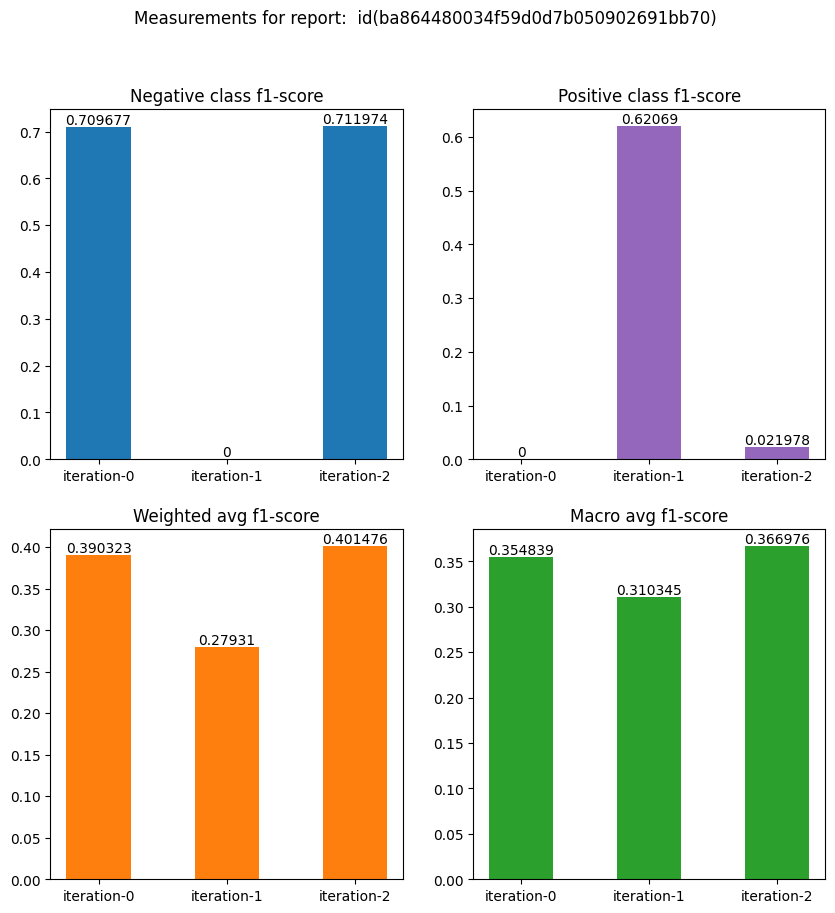

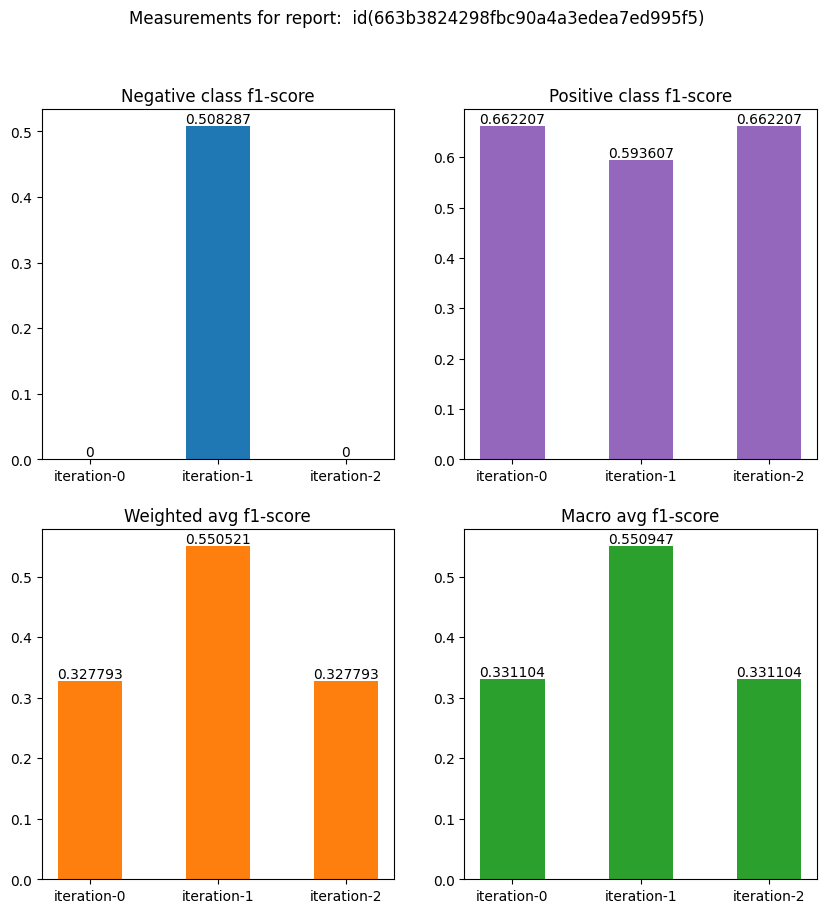

In [9]:
filter_and_plot_reports(property="dim:50", metric="f1-score")